# Customer Retention Dataset

## Introduction

### Customer retention means the process of maintaining or keeping customers once you have acquired them. It’s all the activities that a company must do in order to keep their customers around. The goal is to build a long-lasting relationship between the brand and consumers. Once a customer becomes loyal to your brand, not only he will buy more from you than a normal customer but he’ll spread good words about your business, increase your reputation.

In [1]:
from IPython.display import Image
Image(url= "https://ideasunlimitedonline.com/wp-content/uploads/2019/07/Customer-Retention-Featured-Image.jpg")

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

UsageError: Line magic function `%` not found.


### Importing all the necessaries libraries which will help me for model prediction.

## Loading Dataset

In [2]:
# loading the dataset

df = pd.read_excel('customer_retention_dataset.xlsx')
df.head()

1Gender of respondent 2 How old are you?   \
0                  Male         31-40 years   
1                Female         21-30 years   
2                Female         21-30 years   
3                  Male         21-30 years   
4                Female         21-30 years   

  3 Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   
2                         Greater Noida   
3                               Karnal    
4                            Bangalore    

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       
2                                             201308       
3                                             132001       
4                                             530068       

  5 Since How Long You are Shopping Online ?  \
0                              Above 4 years   
1                              Above 4 years   
2                                  3-4 years   
3                                  3-4 years   
4                                  2-3 years   

  6 How many times you have made an online purchase in the past 1 year?  \
0                                        31-40 times                      
1                                 41 times and above                      
2                                 41 times and above                      
3                                 Less than 10 times                      
4                                        11-20 times                      

  7 How do you access the internet while shopping on-line?  \
0                                            Dial-up         
1                                              Wi-Fi         
2                                    Mobile Internet         
3                                    Mobile Internet         
4                                              Wi-Fi         

  8 Which device do you use to access the online shopping?  \
0                                            Desktop         
1                                         Smartphone         
2                                         Smartphone         
3                                         Smartphone         
4                                         Smartphone         

  9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                             Others                                                     
1                                         4.7 inches                                                     
2                                         5.5 inches                                                     
3                                         5.5 inches                                                     
4                                         4.7 inches                                                     

  10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                              Window/windows Mobile                                                       
1                                            IOS/Mac                                                       
2                                            Android                                                       
3                                            IOS/Mac                                                       
4                                            IOS/Mac                                                       

   ... Longer time to get logged in (promotion, sales period)  \
0  ...                                          Amazon.in       
1  ...                            Amazon.in, Flipkart.com       
2  ...                                         Myntra.com       
3  ...                                       Snapdeal.com       
4 

### Loading the the first 5 rows of Customer Retention dataset.
### I can say that almost all the columns are categorical in nature.

In [7]:
df.shape

(269, 71)

### There are altogether 32560 rows and 15 columns in income census dataset.

In [8]:
# lets find out is there any null value in any columns

pd.set_option('display.max_rows',None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    object
 1   2 How old are you?                                                                                                                                                                    

### There are no null values in dataset

In [13]:
df.nunique()

1Gender of respondent                                                                                                                                                                                                   2
2 How old are you?                                                                                                                                                                                                      5
3 Which city do you shop online from?                                                                                                                                                                                  11
4 What is the Pin Code of where you shop online from?                                                                                                                                                                  39
5 Since How Long You are Shopping Online ?                                                                                      

### There are almost all the columns which are categorical in nature.

In [6]:
df.describe()

4 What is the Pin Code of where you shop online from?
count                                         269.000000    
mean                                       220465.747212    
std                                        140524.341051    
min                                        110008.000000    
25%                                        122018.000000    
50%                                        201303.000000    
75%                                        201310.000000    
max                                        560037.000000

### Only one column data is getting describe as rest all the string type.

## EDA - Exploratory Data Analysis

### Count Plot

**Gender of respondent**

In [7]:
df['1Gender of respondent'].value_counts()

Female    181
Male       88
Name: 1Gender of respondent, dtype: int64

In [8]:
sns.countplot(df['1Gender of respondent'],palette='twilight', data = df);

### From the above count plot I can say that female prefer online shopping more than male as the number of female for online shopping is almost twice than male.

In [9]:
df['3 Which city do you shop online from?'].value_counts()

Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: 3 Which city do you shop online from?, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Delhi'),
  Text(1, 0, 'Greater Noida'),
  Text(2, 0, 'Karnal '),
  Text(3, 0, 'Bangalore '),
  Text(4, 0, 'Noida'),
  Text(5, 0, 'Solan'),
  Text(6, 0, 'Moradabad'),
  Text(7, 0, 'Gurgaon '),
  Text(8, 0, 'Merrut'),
  Text(9, 0, 'Ghaziabad'),
  Text(10, 0, 'Bulandshahr')])

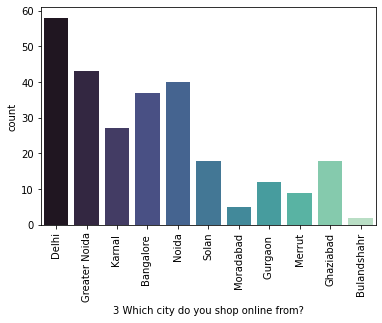

In [10]:
sns.countplot(df['3 Which city do you shop online from?'],palette='mako', data = df);
plt.xticks(rotation=90)

### Delhi is the capital of india. I can say that its a hugh market for e commerce. The above graph gives clear idea the Delhi people prefer online shopping more than any other cities.

In [11]:
df['5 Since How Long You are Shopping Online ?'].value_counts()

Above 4 years       98
2-3 years           65
3-4 years           47
Less than 1 year    43
1-2 years           16
Name: 5 Since How Long You are Shopping Online ?, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Above 4 years'),
  Text(1, 0, '3-4 years'),
  Text(2, 0, '2-3 years'),
  Text(3, 0, 'Less than 1 year'),
  Text(4, 0, '1-2 years')])

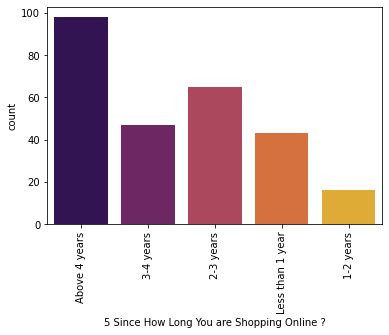

In [12]:
sns.countplot(df['5 Since How Long You are Shopping Online ?'],palette='inferno', data = df);
plt.xticks(rotation=90)

### The above graph gives me an idea that online shopping is trust worthy as the highest count showing is 4+ years. It gives the clear idea that people are getting digital nowadays. Instead of following traditional way of visiting shop and buying good ,they prefer to buy online. I can say that online shopping is time saving in this fast moving world.

In [13]:
df['6 How many times you have made an online purchase in the past 1 year?'].value_counts()

Less than 10 times    114
31-40 times            63
41 times and above     47
11-20 times            29
21-30 times            10
42 times and above      6
Name: 6 How many times you have made an online purchase in the past 1 year?, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '31-40 times'),
  Text(1, 0, '41 times and above'),
  Text(2, 0, 'Less than 10 times'),
  Text(3, 0, '11-20 times'),
  Text(4, 0, '21-30 times'),
  Text(5, 0, '42 times and above')])

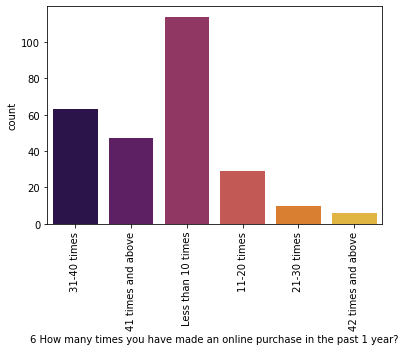

In [14]:
sns.countplot(df['6 How many times you have made an online purchase in the past 1 year?'],palette='inferno', data = df);
plt.xticks(rotation=90)

### From the above graph i can say that people don't buy everything from online store. The highest count is less than 10 times in a year. Its means that online business have hugh indian market which is uncovered yet.

In [15]:
df['7 How do you access the internet while shopping on-line?'].value_counts()

Mobile internet    142
Wi-Fi               76
Mobile Internet     47
Dial-up              4
Name: 7 How do you access the internet while shopping on-line?, dtype: int64

In [16]:
# repalcing the values with mode
df['7 How do you access the internet while shopping on-line?'] = df['7 How do you access the internet while shopping on-line?'].str.replace('Mobile Internet','Mobile internet')

In [17]:
df['7 How do you access the internet while shopping on-line?'].value_counts()

Mobile internet    189
Wi-Fi               76
Dial-up              4
Name: 7 How do you access the internet while shopping on-line?, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'Dial-up'), Text(1, 0, 'Wi-Fi'), Text(2, 0, 'Mobile internet')])

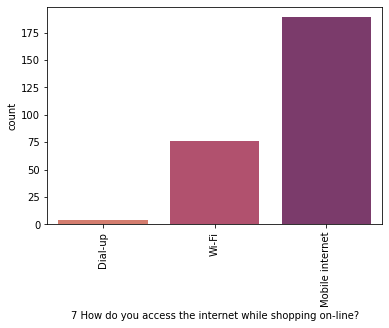

In [18]:
sns.countplot(df['7 How do you access the internet while shopping on-line?'],palette='flare', data = df);
plt.xticks(rotation=90)

### The above graph clearly indicates that people use mobile internet most when its comes to online shopping. Its also gives me an idea that people prefer mobile phone for online shopping than any other device.

In [19]:
df['8 Which device do you use to access the online shopping?'].value_counts()

Smartphone    141
Laptop         86
Desktop        30
Tablet         12
Name: 8 Which device do you use to access the online shopping?, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Desktop'),
  Text(1, 0, 'Smartphone'),
  Text(2, 0, 'Tablet'),
  Text(3, 0, 'Laptop')])

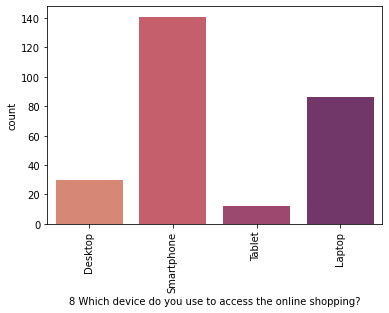

In [20]:
sns.countplot(df['8 Which device do you use to access the online shopping?'],palette='flare', data = df);
plt.xticks(rotation=90)

### In India almost every second person is having a smart phone. Since smart phone is easy to carry so people pefered device for online shopping is mobile phone as people can buy any products from any part of the world.  

In [24]:
df['Longer time in displaying graphics and photos (promotion, sales period)'].value_counts()

Amazon.in, Flipkart.com                60
Amazon.in                              39
Myntra.com                             35
Snapdeal.com                           34
Myntra.com, Snapdeal.com               25
Flipkart.com, Snapdeal.com             19
Paytm.com                              15
Flipkart.com                           15
Amazon.in, Myntra.com, Snapdeal.com    14
Amazon.in, Paytm.com                   13
Name: Longer time in displaying graphics and photos (promotion, sales period), dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Amazon.in'),
  Text(1, 0, 'Myntra.com'),
  Text(2, 0, 'Myntra.com, Snapdeal.com'),
  Text(3, 0, 'Paytm.com'),
  Text(4, 0, 'Amazon.in, Paytm.com'),
  Text(5, 0, 'Amazon.in, Flipkart.com'),
  Text(6, 0, 'Amazon.in, Myntra.com, Snapdeal.com'),
  Text(7, 0, 'Flipkart.com, Snapdeal.com'),
  Text(8, 0, 'Snapdeal.com'),
  Text(9, 0, 'Flipkart.com')])

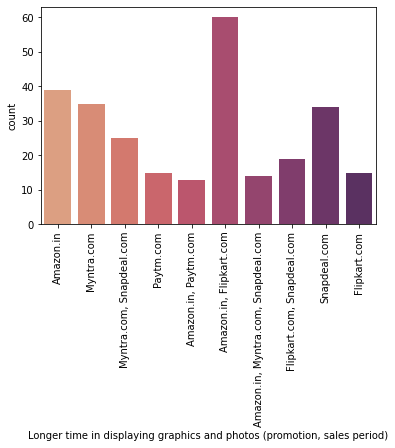

In [25]:
sns.countplot(df['Longer time in displaying graphics and photos (promotion, sales period)'],palette='flare', data = df);
plt.xticks(rotation=90)

### From the above graph i can say that amazon and flipkart took Longer time in displaying graphics and photos than other companies website.

In [26]:
df['Longer time to get logged in (promotion, sales period)'].value_counts()

Amazon.in                                57
Amazon.in, Flipkart.com                  38
Paytm.com                                38
Myntra.com                               35
Amazon.in, Flipkart.com, Snapdeal.com    29
Snapdeal.com                             25
Flipkart.com, Paytm.com                  15
Flipkart.com, Paytm.com, Snapdeal.com    13
Amazon.in, Paytm.com                     11
Flipkart.com                              8
Name: Longer time to get logged in (promotion, sales period), dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Amazon.in'),
  Text(1, 0, 'Amazon.in, Flipkart.com'),
  Text(2, 0, 'Myntra.com'),
  Text(3, 0, 'Snapdeal.com'),
  Text(4, 0, 'Flipkart.com, Paytm.com'),
  Text(5, 0, 'Flipkart.com, Paytm.com, Snapdeal.com'),
  Text(6, 0, 'Amazon.in, Flipkart.com, Snapdeal.com'),
  Text(7, 0, 'Paytm.com'),
  Text(8, 0, 'Amazon.in, Paytm.com'),
  Text(9, 0, 'Flipkart.com')])

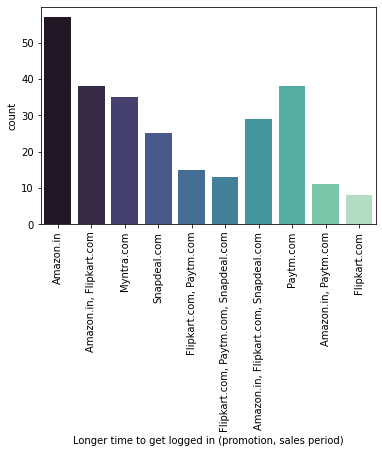

In [29]:
sns.countplot(df['Longer time to get logged in (promotion, sales period)'],palette='mako', data = df);
plt.xticks(rotation=90)

### From the above graph i can understand that amazon take longer time to get logged in than any other companies.

**Perceived Trustworthiness**

In [31]:
df['Perceived Trustworthiness'].value_counts()

Amazon.in                                                       76
Amazon.in, Flipkart.com, Snapdeal.com                           36
Amazon.in, Myntra.com                                           35
Amazon.in, Flipkart.com                                         31
Flipkart.com                                                    27
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               25
Myntra.com                                                      15
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    13
Amazon.in, Flipkart.com, Paytm.com                              11
Name: Perceived Trustworthiness, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Flipkart.com'),
  Text(1, 0, 'Myntra.com'),
  Text(2, 0, 'Amazon.in, Myntra.com'),
  Text(3, 0, 'Amazon.in, Flipkart.com, Snapdeal.com'),
  Text(4, 0, 'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com'),
  Text(5, 0, 'Amazon.in'),
  Text(6, 0, 'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com'),
  Text(7, 0, 'Amazon.in, Flipkart.com'),
  Text(8, 0, 'Amazon.in, Flipkart.com, Paytm.com')])

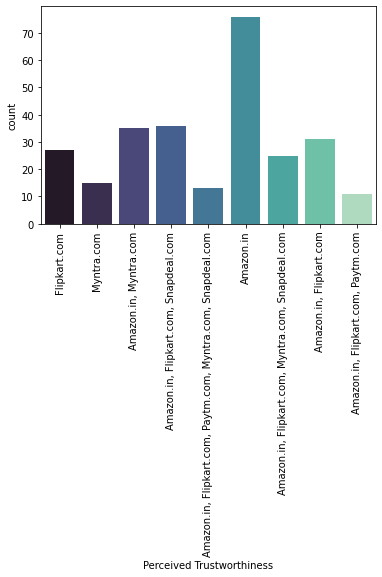

In [32]:
sns.countplot(df['Perceived Trustworthiness'],palette='mako', data = df);
plt.xticks(rotation=90)

### Trust plays the vital role in any brand. The above graph i can say that amazon have huge brand value as it is trust worthy.

In [33]:
df['Security of customer financial information'].value_counts()

Amazon.in                                                       51
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    42
Flipkart.com                                                    33
Amazon.in, Flipkart.com, Snapdeal.com                           25
Amazon.in, Flipkart.com                                         24
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Snapdeal.com                                         19
Paytm.com                                                       15
Myntra.com                                                      15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Amazon.in, Flipkart.com, Paytm.com                              11
Name: Security of customer financial information, dtype: int64

In [35]:
sns.countplot(df['Security of customer financial information'], data = df);
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Amazon.in'),
  Text(1, 0, 'Myntra.com'),
  Text(2, 0, 'Amazon.in, Paytm.com, Myntra.com'),
  Text(3, 0, 'Amazon.in, Flipkart.com, Snapdeal.com'),
  Text(4, 0, 'Paytm.com'),
  Text(5, 0, 'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com'),
  Text(6, 0, 'Flipkart.com'),
  Text(7, 0, 'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com'),
  Text(8, 0, 'Amazon.in, Flipkart.com'),
  Text(9, 0, 'Amazon.in, Flipkart.com, Paytm.com'),
  Text(10, 0, 'Amazon.in, Snapdeal.com')])

### From the above graph i can say that amazon keep the financial information of there customer safe and secure.

In [36]:
df['Privacy of customers’ information'].value_counts()

Amazon.in                                                       71
Amazon.in, Flipkart.com                                         54
Amazon.in, Flipkart.com, Myntra.com                             25
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    24
Paytm.com                                                       18
Flipkart.com                                                    15
Amazon.in, Paytm.com                                            15
Myntra.com                                                      15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Amazon.in, Flipkart.com, Paytm.com                              11
Amazon.in, Flipkart.com, Snapdeal.com                            7
Name: Privacy of customers’ information, dtype: int64

In [37]:
sns.countplot(df['Privacy of customers’ information'], data = df);
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Amazon.in'),
  Text(1, 0, 'Myntra.com'),
  Text(2, 0, 'Amazon.in, Flipkart.com, Myntra.com'),
  Text(3, 0, 'Amazon.in, Paytm.com'),
  Text(4, 0, 'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com'),
  Text(5, 0, 'Paytm.com'),
  Text(6, 0, 'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com'),
  Text(7, 0, 'Amazon.in, Flipkart.com'),
  Text(8, 0, 'Amazon.in, Flipkart.com, Paytm.com'),
  Text(9, 0, 'Amazon.in, Flipkart.com, Snapdeal.com'),
  Text(10, 0, 'Flipkart.com')])

### From the above graph i can say that amazon maintain the privacy of there customer by keeping keeping there personal information safe and secure.

In [40]:
df['Availability of several payment options'].value_counts()

Amazon.in, Flipkart.com                                         65
Amazon.in, Flipkart.com, Myntra.com                             40
Amazon.in, Flipkart.com, Patym.com, Myntra.com, Snapdeal.com    39
Amazon.in                                                       23
Patym.com, Myntra.com                                           20
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               19
Amazon.in, Flipkart.com, Snapdeal.com                           18
Flipkart.com, Myntra.com, Snapdeal.com                          14
Patym.com                                                       12
Amazon.in, Patym.com                                            11
Flipkart.com                                                     8
Name: Availability of several payment options, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Patym.com'),
  Text(1, 0, 'Amazon.in, Flipkart.com, Myntra.com'),
  Text(2, 0, 'Patym.com, Myntra.com'),
  Text(3, 0, 'Amazon.in, Flipkart.com, Patym.com, Myntra.com, Snapdeal.com'),
  Text(4, 0, 'Amazon.in, Flipkart.com, Snapdeal.com'),
  Text(5, 0, 'Amazon.in, Flipkart.com'),
  Text(6, 0, 'Flipkart.com, Myntra.com, Snapdeal.com'),
  Text(7, 0, 'Amazon.in, Patym.com'),
  Text(8, 0, 'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com'),
  Text(9, 0, 'Amazon.in'),
  Text(10, 0, 'Flipkart.com')])

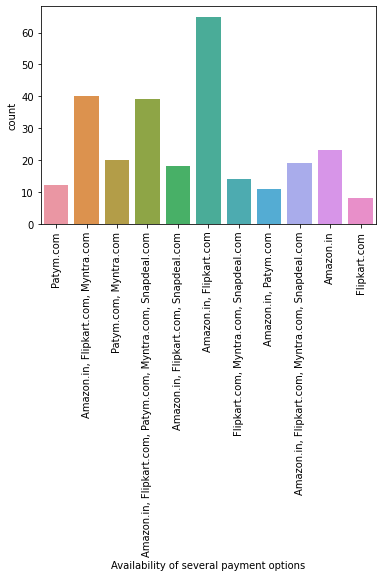

In [41]:
sns.countplot(df['Availability of several payment options'], data = df);
plt.xticks(rotation=90)

### Amazon and filpkart both are competing each other in terms of providing maximum payment option to his customers.

In [43]:
df['Quickness to complete purchase'].value_counts()

Amazon.com                                                   66
Amazon.com, Flipkart.com, Paytm.com                          47
Amazon.com, Flipkart.com                                     37
Amazon.com, Flipkart.com, Myntra.com                         30
Paytm.com                                                    25
Amazon.com, Paytm.com, Myntra.com                            20
Amazon.com, Flipkart.com, Paytm.com, Myntra.com, Snapdeal    15
Flipkart.com                                                 15
Flipkart.com, Myntra.com, Snapdeal                           14
Name: Quickness to complete purchase, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Paytm.com'),
  Text(1, 0, 'Amazon.com, Flipkart.com, Myntra.com'),
  Text(2, 0, 'Amazon.com, Paytm.com, Myntra.com'),
  Text(3, 0, 'Amazon.com, Flipkart.com, Paytm.com'),
  Text(4, 0, 'Amazon.com, Flipkart.com, Paytm.com, Myntra.com, Snapdeal'),
  Text(5, 0, 'Amazon.com'),
  Text(6, 0, 'Flipkart.com, Myntra.com, Snapdeal'),
  Text(7, 0, 'Amazon.com, Flipkart.com'),
  Text(8, 0, 'Flipkart.com')])

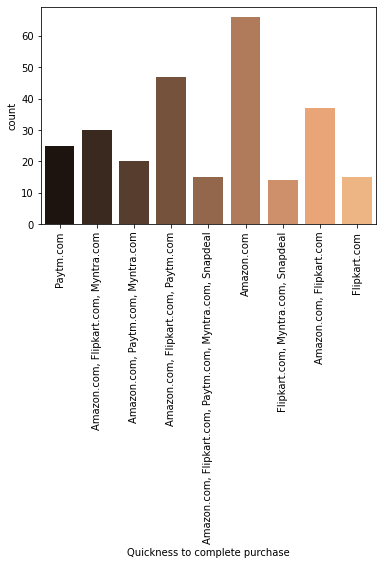

In [45]:
sns.countplot(df['Quickness to complete purchase'],palette='copper', data = df);
plt.xticks(rotation=90)

### Amazon took very less time is purchasing any goods than any other online companies.

In [46]:
df['Reliability of the website or application'].value_counts()

Amazon.in                                            61
Amazon.in, Flipkart.com                              50
Amazon.in, Flipkart.com, Paytm.com                   36
Amazon.in, Paytm.com, Myntra.com                     35
Amazon.in, Flipkart.com, Snapdeal.com                18
Flipkart.com                                         15
Myntra.com                                           15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com    14
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com     13
Paytm.com                                            12
Name: Reliability of the website or application, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Paytm.com'),
  Text(1, 0, 'Myntra.com'),
  Text(2, 0, 'Amazon.in, Paytm.com, Myntra.com'),
  Text(3, 0, 'Amazon.in, Flipkart.com, Paytm.com'),
  Text(4, 0, 'Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com'),
  Text(5, 0, 'Amazon.in, Flipkart.com, Snapdeal.com'),
  Text(6, 0, 'Amazon.in'),
  Text(7, 0, 'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com'),
  Text(8, 0, 'Amazon.in, Flipkart.com'),
  Text(9, 0, 'Flipkart.com')])

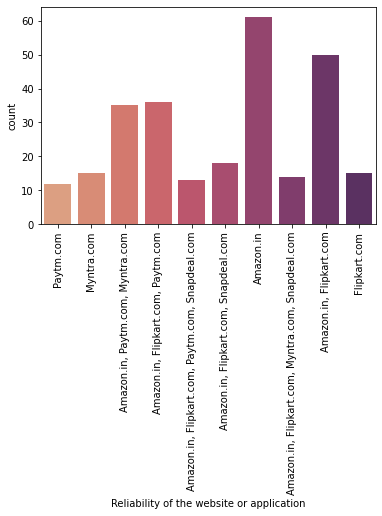

In [47]:
sns.countplot(df['Reliability of the website or application'],palette='flare', data = df);
plt.xticks(rotation=90)

### When it comes to reliability of the website or application for online shopping amazon is the first choice of customer.

In [5]:
df['Fast loading website speed of website and application'].value_counts()

Amazon.in                                                       51
Amazon.in, Paytm.com                                            44
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    30
Amazon.in, Flipkart.com, Myntra.com                             30
Amazon.in, Flipkart.com                                         30
Amazon.in, Flipkart.com, Snapdeal.com                           25
Amazon.in, Flipkart.com, Paytm.com                              25
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Snapdeal.com                                                    12
Flipkart.com                                                     8
Name: Fast loading website speed of website and application, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Snapdeal.com'),
  Text(1, 0, 'Amazon.in, Flipkart.com, Myntra.com'),
  Text(2, 0, 'Amazon.in, Paytm.com'),
  Text(3, 0, 'Amazon.in, Flipkart.com, Snapdeal.com'),
  Text(4, 0, 'Amazon.in'),
  Text(5, 0, 'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com'),
  Text(6, 0, 'Amazon.in, Flipkart.com, Paytm.com'),
  Text(7, 0, 'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com'),
  Text(8, 0, 'Amazon.in, Flipkart.com'),
  Text(9, 0, 'Flipkart.com')])

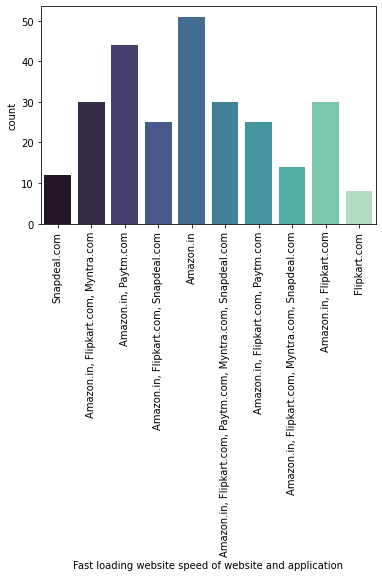

In [6]:
sns.countplot(df['Fast loading website speed of website and application'],palette='mako', data = df);
plt.xticks(rotation=90)

### From the above graph i can say that amazon website works really well as it is fastest among other websites while loading the page.

In [7]:
df['Complete, relevant description information of products'].value_counts()

Amazon.in, Flipkart.com                                         100
Amazon.in                                                        43
Amazon.in, Flipkart.com, Paytm.com                               24
Amazon.in, Paytm.com, Myntra.com                                 20
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com     15
Amazon.in, Flipkart.com, Myntra.com                              15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                14
Snapdeal.com                                                     12
Flipkart.com, Snapdeal.com                                       11
Flipkart.com                                                      8
Amazon.in, Flipkart.com, Snapdeal.com                             7
Name: Complete, relevant description information of products, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Snapdeal.com'),
  Text(1, 0, 'Amazon.in, Flipkart.com, Myntra.com'),
  Text(2, 0, 'Amazon.in, Paytm.com, Myntra.com'),
  Text(3, 0, 'Amazon.in, Flipkart.com'),
  Text(4, 0, 'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com'),
  Text(5, 0, 'Amazon.in, Flipkart.com, Paytm.com'),
  Text(6, 0, 'Flipkart.com, Snapdeal.com'),
  Text(7, 0, 'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com'),
  Text(8, 0, 'Amazon.in'),
  Text(9, 0, 'Amazon.in, Flipkart.com, Snapdeal.com'),
  Text(10, 0, 'Flipkart.com')])

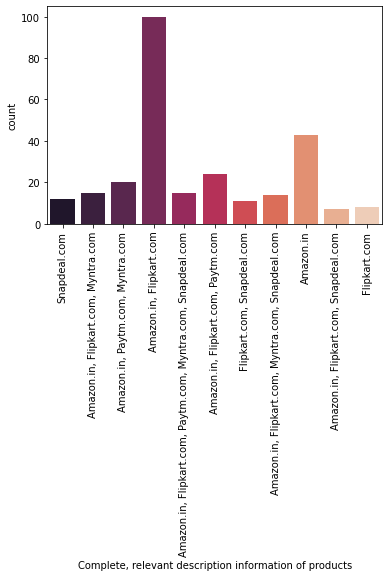

In [8]:
sns.countplot(df['Complete, relevant description information of products'],palette='rocket', data = df);
plt.xticks(rotation=90)

### Amazon and flipkart are in great competation. Both provide complete relevant decription of products to their customer.

In [9]:
df['Wild variety of product on offer'].value_counts()

Amazon.in, Flipkart.com                              130
Amazon.in                                             43
Amazon.in, Myntra.com                                 20
Myntra.com                                            15
Flipkart.com, Myntra.com                              15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com     14
Amazon.in, Flipkart.com, Paytm.com                    13
Flipkart.com                                          12
Paytm.com                                              7
Name: Wild variety of product on offer, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Flipkart.com'),
  Text(1, 0, 'Flipkart.com, Myntra.com'),
  Text(2, 0, 'Amazon.in, Myntra.com'),
  Text(3, 0, 'Amazon.in, Flipkart.com'),
  Text(4, 0, 'Myntra.com'),
  Text(5, 0, 'Amazon.in, Flipkart.com, Paytm.com'),
  Text(6, 0, 'Amazon.in'),
  Text(7, 0, 'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com'),
  Text(8, 0, 'Paytm.com')])

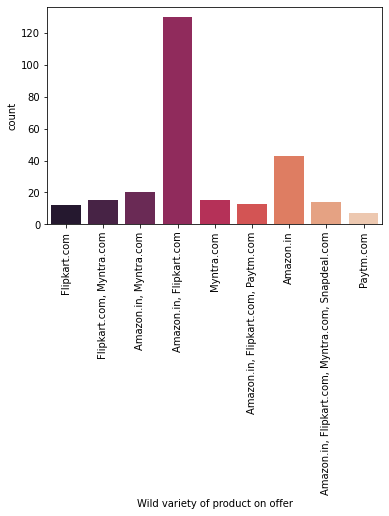

In [10]:
sns.countplot(df['Wild variety of product on offer'],palette='rocket', data = df);
plt.xticks(rotation=90)

### Amazon and flipkrt both have huge variety of products for their customer. So both have wide range of customer and they have good stake in online market.

In [11]:
df['Visual appealing web-page layout'].value_counts()

Amazon.in, Flipkart.com                                         87
Amazon.in                                                       44
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    36
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Myntra.com                                           15
Myntra.com                                                      15
Flipkart.com, Myntra.com                                        15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Flipkart.com                                                    12
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                11
Name: Visual appealing web-page layout, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Flipkart.com'),
  Text(1, 0, 'Amazon.in, Myntra.com'),
  Text(2, 0, 'Amazon.in, Paytm.com, Myntra.com'),
  Text(3, 0, 'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com'),
  Text(4, 0, 'Myntra.com'),
  Text(5, 0, 'Amazon.in, Flipkart.com'),
  Text(6, 0, 'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com'),
  Text(7, 0, 'Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com'),
  Text(8, 0, 'Flipkart.com, Myntra.com'),
  Text(9, 0, 'Amazon.in')])

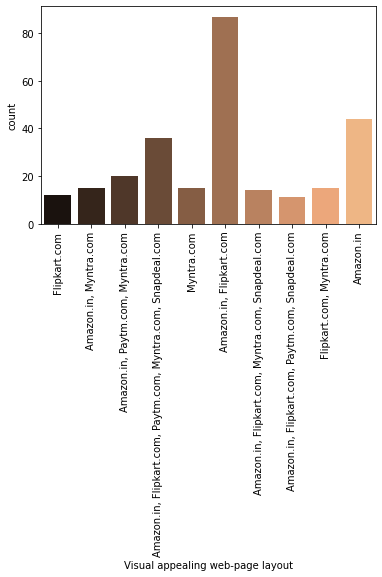

In [12]:
sns.countplot(df['Visual appealing web-page layout'],palette='copper', data = df);
plt.xticks(rotation=90)

### Amazon and flipkart have most attractive web page layout which emphasis their customer to purshase products. 

In [13]:
df['Easy to use website or application'].value_counts()

Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    64
Amazon.in, Flipkart.com                                         44
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in                                                       29
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                22
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Flipkart.com, Myntra.com                             19
Paytm.com                                                       12
Flipkart.com                                                     8
Amazon.in, Paytm.com                                             7
Name: Easy to use website or application, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Paytm.com'),
  Text(1, 0, 'Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com'),
  Text(2, 0, 'Amazon.in, Paytm.com, Myntra.com'),
  Text(3, 0, 'Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com'),
  Text(4, 0, 'Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com'),
  Text(5, 0, 'Amazon.in, Flipkart.com'),
  Text(6, 0, 'Amazon.in, Flipkart.com, Myntra.com'),
  Text(7, 0, 'Amazon.in'),
  Text(8, 0, 'Amazon.in, Paytm.com'),
  Text(9, 0, 'Flipkart.com')])

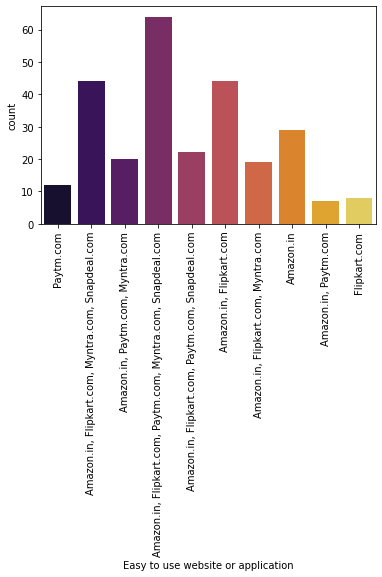

In [19]:
sns.countplot(df['Easy to use website or application'],palette='inferno', data = df);
plt.xticks(rotation=90)

### From the above plot i can say that almost all the online shoppings websites applications are easy to use for customer.

In [17]:
df['47 Getting value for money spent'].value_counts()

Agree (4)             149
Strongly agree (5)     82
indifferent (3)        38
Name: 47 Getting value for money spent, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'Strongly agree (5)'),
  Text(1, 0, 'Agree (4)'),
  Text(2, 0, 'indifferent (3)')])

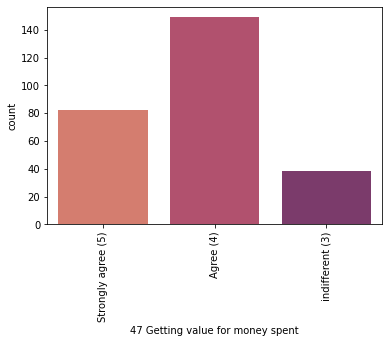

In [22]:
sns.countplot(df['47 Getting value for money spent'],palette='flare', data = df);
plt.xticks(rotation=90)

### From the above plot i can say that people who spent money through online shopping is worthy as they are getting the products according to there expection.

In [20]:
df['46 Shopping on the website helps you fulfill certain roles'].value_counts()

Agree (4)                88
indifferent (3)          88
Strongly agree (5)       38
Strongly disagree (1)    33
Dis-agree (2)            22
Name: 46 Shopping on the website helps you fulfill certain roles, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Agree (4)'),
  Text(1, 0, 'Strongly agree (5)'),
  Text(2, 0, 'indifferent (3)'),
  Text(3, 0, 'Strongly disagree (1)'),
  Text(4, 0, 'Dis-agree (2)')])

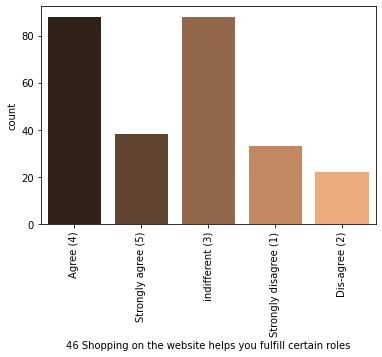

In [21]:
sns.countplot(df['46 Shopping on the website helps you fulfill certain roles'],palette='copper', data = df);
plt.xticks(rotation=90)

### Online shopping plays important role in helping there customers to understand website appropriately.

In [23]:
df['45 You feel gratification shopping on your favorite e-tailer'].value_counts()

indifferent (3)          101
Strongly agree (5)        65
Agree (4)                 63
Disagree (2)              22
Strongly disagree (1)     18
Name: 45 You feel gratification shopping on your favorite e-tailer, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Strongly agree (5)'),
  Text(1, 0, 'indifferent (3)'),
  Text(2, 0, 'Agree (4)'),
  Text(3, 0, 'Strongly disagree (1)'),
  Text(4, 0, 'Disagree (2)')])

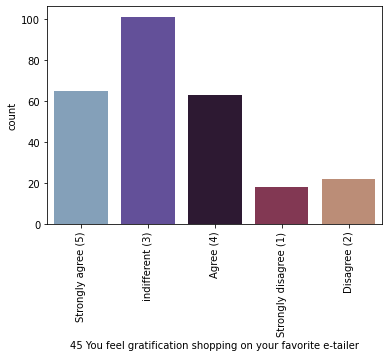

In [25]:
sns.countplot(df['45 You feel gratification shopping on your favorite e-tailer'],palette='twilight', data = df);
plt.xticks(rotation=90)

### From the above plot i can say that not all the customer who prefer online shopping get satisfied from the products.

In [28]:
df['43 Shopping on the website gives you the sense of adventure'].value_counts()

Agree (4)                101
indifferent (3)           59
Strongly agree (5)        54
Dis-agree (2)             50
Strongly disagree (1)      5
Name: 43 Shopping on the website gives you the sense of adventure, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Agree (4)'),
  Text(1, 0, 'indifferent (3)'),
  Text(2, 0, 'Strongly agree (5)'),
  Text(3, 0, 'Dis-agree (2)'),
  Text(4, 0, 'Strongly disagree (1)')])

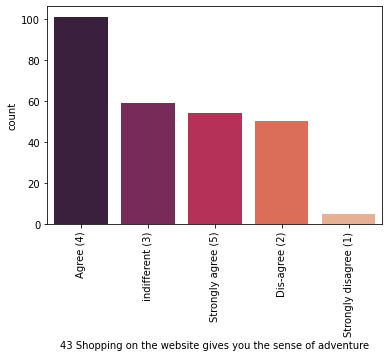

In [29]:
sns.countplot(df['43 Shopping on the website gives you the sense of adventure'],palette='rocket', data = df);
plt.xticks(rotation=90)

### From the above plot i can say that people who do online shopping have sense of adventure in searching wide range of products.

In [30]:
df['42 The Convenience of patronizing the online retailer'].value_counts()

Agree (4)             138
indifferent (3)        77
Strongly agree (5)     54
Name: 42 The Convenience of patronizing the online retailer, dtype: int64

In [31]:
sns.countplot(df['42 The Convenience of patronizing the online retailer'],palette='rocket', data = df);
plt.xticks(rotation=90)

(array([0, 1, 2]),
 [Text(0, 0, 'indifferent (3)'),
  Text(1, 0, 'Agree (4)'),
  Text(2, 0, 'Strongly agree (5)')])

### The above plot i can say the people have feeling of superiority from online shopping.

In [32]:
df['41 Monetary savings'].value_counts()

Strongly agree (5)    148
Agree (4)              75
Disagree (2)           31
indifferent (3)        15
Name: 41 Monetary savings, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Disagree (2)'),
  Text(1, 0, 'Strongly agree (5)'),
  Text(2, 0, 'Agree (4)'),
  Text(3, 0, 'indifferent (3)')])

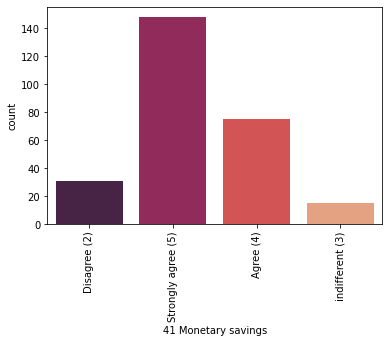

In [33]:
sns.countplot(df['41 Monetary savings'],palette='rocket', data = df);
plt.xticks(rotation=90)

### From the above graph i can say that people have monetary saving from online shopping website as it gives more offers and discounts on there products.

In [34]:
df['40 Provision of complete and relevant product information'].value_counts()

Strongly agree (5)    135
Agree (4)              98
indifferent (3)        31
Disagree (2)            5
Name: 40 Provision of complete and relevant product information, dtype: int64

In [35]:
sns.countplot(df['40 Provision of complete and relevant product information'],palette='rocket', data = df);
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'indifferent (3)'),
  Text(1, 0, 'Strongly agree (5)'),
  Text(2, 0, 'Agree (4)'),
  Text(3, 0, 'Disagree (2)')])

### From the above graph i can say that people are strongly agree on providing all the relevant product information.

In [6]:
df['39 Offering a wide variety of listed product in several category'].value_counts()

Strongly agree (5)    111
Agree (4)              94
indifferent (3)        57
Dis-agree (2)           7
Name: 39 Offering a wide variety of listed product in several category, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'indifferent (3)'),
  Text(1, 0, 'Strongly agree (5)'),
  Text(2, 0, 'Agree (4)'),
  Text(3, 0, 'Dis-agree (2)')])

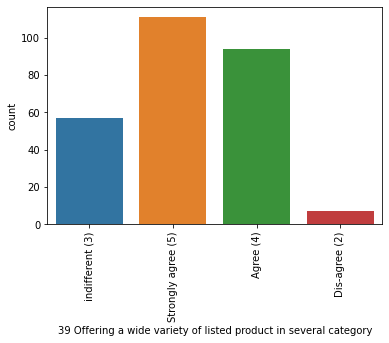

In [12]:
sns.countplot(df['39 Offering a wide variety of listed product in several category'], data = df);
plt.xticks(rotation=90)

### In this graph i can say that people are strongly agree with the fact that online selling product have huge variety in the market for their customers.

In [8]:
df['38 User satisfaction cannot exist without trust'].value_counts()

Strongly agree (5)       122
Agree (4)                117
Strongly disagree (1)     18
Dis-agree (2)              7
indifferent (3)            5
Name: 38 User satisfaction cannot exist without trust, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Strongly agree (5)'),
  Text(1, 0, 'Agree (4)'),
  Text(2, 0, 'Strongly disagree (1)'),
  Text(3, 0, 'Dis-agree (2)'),
  Text(4, 0, 'indifferent (3)')])

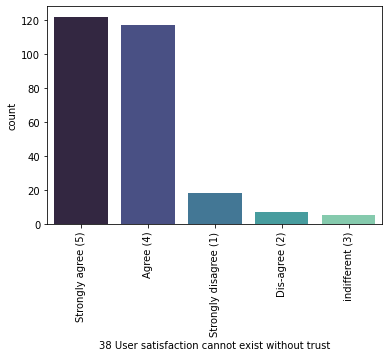

In [13]:
sns.countplot(df['38 User satisfaction cannot exist without trust'],palette='mako', data = df);
plt.xticks(rotation=90)

### In online shopping customer are strongly agree with the fact that user satisfaction cannot exist without trust.

In [14]:
df['37 Net Benefit derived from shopping online can lead to users satisfaction'].value_counts()

Strongly agree (5)    164
Agree (4)              54
indifferent (3)        40
Dis-agree (2)          11
Name: 37 Net Benefit derived from shopping online can lead to users satisfaction, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Agree (4)'),
  Text(1, 0, 'Strongly agree (5)'),
  Text(2, 0, 'indifferent (3)'),
  Text(3, 0, 'Dis-agree (2)')])

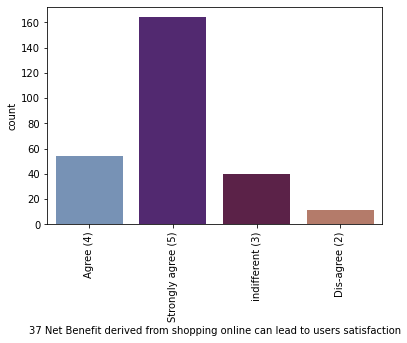

In [16]:
sns.countplot(df['37 Net Benefit derived from shopping online can lead to users satisfaction'],palette='twilight', data = df);
plt.xticks(rotation=90)

### In online shopping customer are strongly agree with the fact that Net Benefit derived from shopping online can lead to users satisfaction.

In [17]:
df['36 User derive satisfaction while shopping on a good quality website or application'].value_counts()

Strongly agree (5)    175
Agree (4)              86
Dis-agree (2)           8
Name: 36 User derive satisfaction while shopping on a good quality website or application, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'Strongly agree (5)'),
  Text(1, 0, 'Agree (4)'),
  Text(2, 0, 'Dis-agree (2)')])

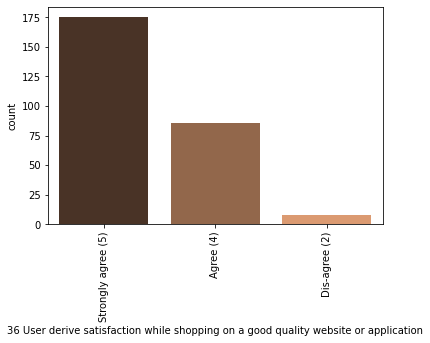

In [18]:
sns.countplot(df['36 User derive satisfaction while shopping on a good quality website or application'],palette='copper', data = df);
plt.xticks(rotation=90)

### In online shopping customer are strongly agree with the fact that User derive satisfaction while shopping on a good quality website or application.

In [19]:
df['35 Displaying quality Information on the website improves satisfaction of customers'].value_counts()

Strongly agree (5)    133
Agree (4)              80
indifferent (3)        56
Name: 35 Displaying quality Information on the website improves satisfaction of customers, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'indifferent (3)'),
  Text(1, 0, 'Strongly agree (5)'),
  Text(2, 0, 'Agree (4)')])

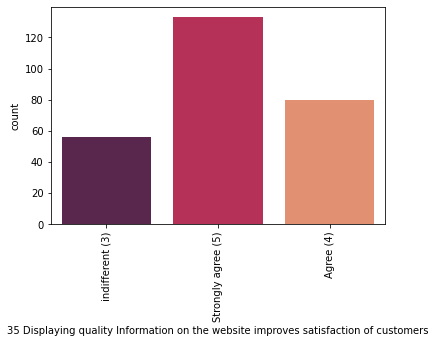

In [21]:
sns.countplot(df['35 Displaying quality Information on the website improves satisfaction of customers'],palette='rocket', data = df);
plt.xticks(rotation=90)

### In online shopping customer are strongly agree with the fact that Displaying quality Information on the website improves satisfaction of customers.

In [22]:
df['34 Gaining access to loyalty programs is a benefit of shopping online'].value_counts()

Strongly agree (5)       115
Agree (4)                 64
indifferent (3)           64
Dis-agree (2)             15
Strongly disagree (1)     11
Name: 34 Gaining access to loyalty programs is a benefit of shopping online, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Agree (4)'),
  Text(1, 0, 'Strongly agree (5)'),
  Text(2, 0, 'indifferent (3)'),
  Text(3, 0, 'Dis-agree (2)'),
  Text(4, 0, 'Strongly disagree (1)')])

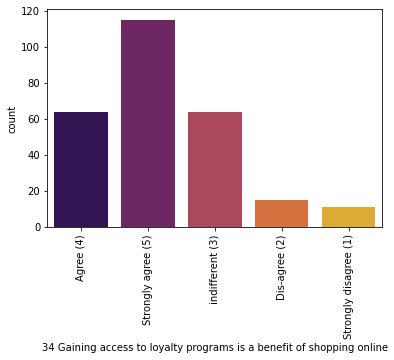

In [24]:
sns.countplot(df['34 Gaining access to loyalty programs is a benefit of shopping online'],palette='inferno', data = df);
plt.xticks(rotation=90)

### In online shopping customer are strongly agree with the fact that Gaining access to loyalty programs is a benefit of shopping online.

In [25]:
df['33 Return and replacement policy of the e-tailer is important for purchase decision'].value_counts()

Strongly agree (5)    198
Agree (4)              51
Dis-agree (2)          20
Name: 33 Return and replacement policy of the e-tailer is important for purchase decision, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'Dis-agree (2)'),
  Text(1, 0, 'Strongly agree (5)'),
  Text(2, 0, 'Agree (4)')])

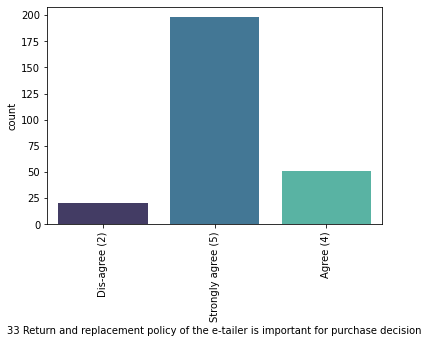

In [27]:
sns.countplot(df['33 Return and replacement policy of the e-tailer is important for purchase decision'],palette='mako', data = df);
plt.xticks(rotation=90)

### In online shopping customer are strongly agree with the fact that Return and replacement policy of the e-tailer is important for purchase decision.

**Shopping online is convenient and flexible**

In [28]:
df['32 Shopping online is convenient and flexible'].value_counts()

Strongly agree (5)    146
Agree (4)              78
indifferent (3)        33
Dis-agree (2)          12
Name: 32 Shopping online is convenient and flexible, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Dis-agree (2)'),
  Text(1, 0, 'Strongly agree (5)'),
  Text(2, 0, 'indifferent (3)'),
  Text(3, 0, 'Agree (4)')])

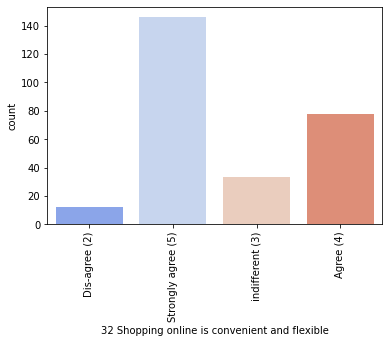

In [29]:
sns.countplot(df['32 Shopping online is convenient and flexible'],palette='coolwarm', data = df);
plt.xticks(rotation=90)

### In online shopping customer are strongly agree with the fact that Shopping online is convenient and flexible.

In [30]:
df['31 Enjoyment is derived from shopping online'].value_counts()

Strongly agree (5)       86
indifferent (3)          75
Agree (4)                59
Strongly disagree (1)    30
Dis-agree (2)            19
Name: 31 Enjoyment is derived from shopping online, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Strongly disagree (1)'),
  Text(1, 0, 'Strongly agree (5)'),
  Text(2, 0, 'indifferent (3)'),
  Text(3, 0, 'Agree (4)'),
  Text(4, 0, 'Dis-agree (2)')])

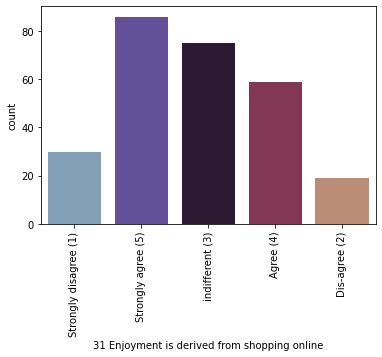

In [32]:
sns.countplot(df['31 Enjoyment is derived from shopping online'],palette='twilight', data = df);
plt.xticks(rotation=90)

### In online shopping customer are strongly agree with the fact that Enjoyment is derived from shopping online.

In [33]:
df['30 Online shopping gives monetary benefit and discounts'].value_counts()

Strongly agree (5)       105
Agree (4)                 85
indifferent (3)           50
Strongly disagree (1)     18
Dis-agree (2)             11
Name: 30 Online shopping gives monetary benefit and discounts, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'indifferent (3)'),
  Text(1, 0, 'Strongly agree (5)'),
  Text(2, 0, 'Agree (4)'),
  Text(3, 0, 'Strongly disagree (1)'),
  Text(4, 0, 'Dis-agree (2)')])

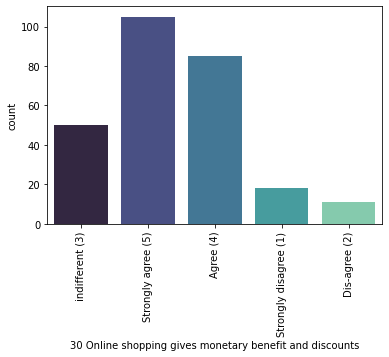

In [34]:
sns.countplot(df['30 Online shopping gives monetary benefit and discounts'],palette='mako', data = df);
plt.xticks(rotation=90)

### In online shopping customer are strongly agree with the fact that Online shopping gives monetary benefit and discounts.

In [35]:
df['29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)'].value_counts()

Strongly agree (5)       149
Agree (4)                 94
indifferent (3)           15
Strongly disagree (1)     11
Name: 29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.), dtype: int64

In [36]:
sns.countplot(df['29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)'],palette='copper', data = df);
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Agree (4)'),
  Text(1, 0, 'Strongly agree (5)'),
  Text(2, 0, 'indifferent (3)'),
  Text(3, 0, 'Strongly disagree (1)')])

### In online shopping customer are strongly agree with the fact that Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)

In [42]:
df['28 Being able to guarantee the privacy of the customer'].value_counts()

Strongly agree (5)    185
Agree (4)              58
indifferent (3)        26
Name: 28 Being able to guarantee the privacy of the customer, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'Agree (4)'),
  Text(1, 0, 'Strongly agree (5)'),
  Text(2, 0, 'indifferent (3)')])

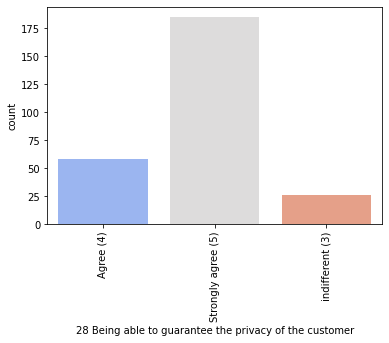

In [43]:
sns.countplot(df['28 Being able to guarantee the privacy of the customer'],palette='coolwarm', data = df);
plt.xticks(rotation=90)

### In online shopping customer are strongly agree with the fact that Being able to guarantee the privacy of the customer.

In [44]:
df['27 Empathy (readiness to assist with queries) towards the customers'].value_counts()

Strongly agree (5)       194
Agree (4)                 42
Strongly disagree (1)     18
indifferent (3)           15
Name: 27 Empathy (readiness to assist with queries) towards the customers, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Strongly agree (5)'),
  Text(1, 0, 'Agree (4)'),
  Text(2, 0, 'Strongly disagree (1)'),
  Text(3, 0, 'indifferent (3)')])

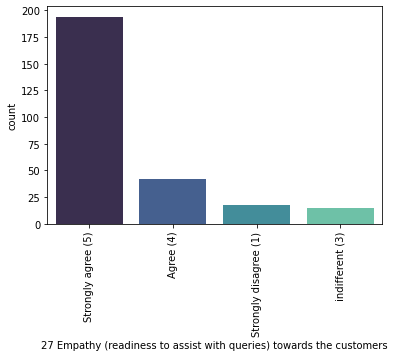

In [45]:
sns.countplot(df['27 Empathy (readiness to assist with queries) towards the customers'],palette='mako', data = df);
plt.xticks(rotation=90)

### In online shopping customer are strongly agree with the fact that Empathy (readiness to assist with queries) towards the customers.

In [46]:
df['26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time'].value_counts()

Strongly agree (5)    141
Agree (4)              86
Disagree (2)           30
indifferent  (3)       12
Name: 26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time, dtype: int64

In [48]:
sns.countplot(df['26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time'],palette='inferno', data = df);
plt.xticks(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Disagree (2)'),
  Text(1, 0, 'Strongly agree (5)'),
  Text(2, 0, 'Agree (4)'),
  Text(3, 0, 'indifferent  (3)')])

### In online shopping customer are strongly agree with the fact that Trust that the online retail store will fulfill its part of the transaction at the stipulated time.

In [49]:
df['25 Convenient Payment methods'].value_counts()

Strongly agree (5)    159
Agree (4)              80
Dis-agree (2)          30
Name: 25 Convenient Payment methods, dtype: int64

In [51]:
sns.countplot(df['25 Convenient Payment methods'],palette='twilight', data = df);
plt.xticks(rotation=90)

(array([0, 1, 2]),
 [Text(0, 0, 'Dis-agree (2)'),
  Text(1, 0, 'Strongly agree (5)'),
  Text(2, 0, 'Agree (4)')])

### In online shopping customer are strongly agree with the fact that Convenient Payment methods.

In [55]:
df['24 User friendly Interface of the website'].value_counts()

Strongly agree (5)       189
Agree (4)                 45
Strongly disagree (1)     18
Dis-agree (2)             12
Indifferent (3)            5
Name: 24 User friendly Interface of the website, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Dis-agree (2)'),
  Text(1, 0, 'Strongly agree (5)'),
  Text(2, 0, 'Agree (4)'),
  Text(3, 0, 'Strongly disagree (1)'),
  Text(4, 0, 'Indifferent (3)')])

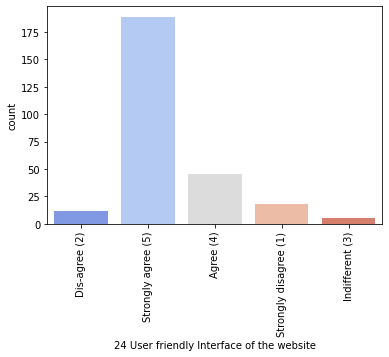

In [52]:
sns.countplot(df['24 User friendly Interface of the website'],palette='coolwarm', data = df);
plt.xticks(rotation=90)

### In online shopping customer are strongly agree with the fact that online shopping website have user friendly interface of the website.

In [56]:
df['23 Loading and processing speed'].value_counts()

Strongly agree (5)       115
Agree (4)                112
Dis-agree (2)             18
Strongly disagree (1)     12
Indifferent (3)           12
Name: 23 Loading and processing speed, dtype: int64

In [58]:
sns.countplot(df['23 Loading and processing speed'],palette='copper', data = df);
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Strongly disagree (1)'),
  Text(1, 0, 'Strongly agree (5)'),
  Text(2, 0, 'Agree (4)'),
  Text(3, 0, 'Dis-agree (2)'),
  Text(4, 0, 'Indifferent (3)')])

### In online shopping customer are strongly agree with the fact that website have good Loading and processing speed.

In [59]:
df['22 Ease of navigation in website'].value_counts()

Strongly agree (5)       141
Agree (4)                105
Strongly disagree (1)     18
Dis-agree (2)              5
Name: 22 Ease of navigation in website, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Agree (4)'),
  Text(1, 0, 'Strongly agree (5)'),
  Text(2, 0, 'Strongly disagree (1)'),
  Text(3, 0, 'Dis-agree (2)')])

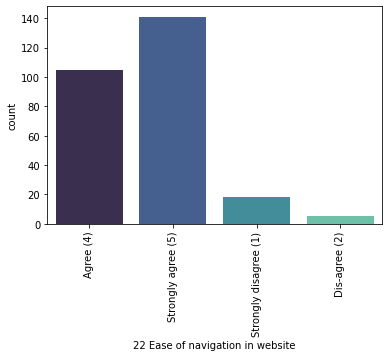

In [60]:
sns.countplot(df['22 Ease of navigation in website'],palette='mako', data = df);
plt.xticks(rotation=90)

### In online shopping customer are strongly agree with the fact that it has Ease of navigation in website.

In [61]:
df['21 All relevant information on listed products must be stated clearly'].value_counts()

Agree (4)                132
Strongly agree (5)       107
Strongly disagree (1)     18
Dis-agree (2)             12
Name: 21 All relevant information on listed products must be stated clearly, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Agree (4)'),
  Text(1, 0, 'Strongly agree (5)'),
  Text(2, 0, 'Strongly disagree (1)'),
  Text(3, 0, 'Dis-agree (2)')])

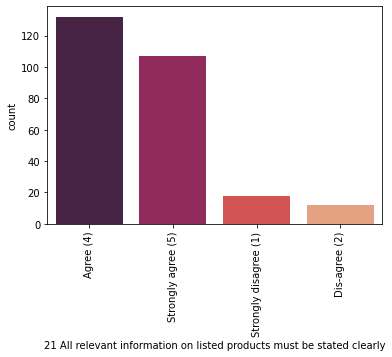

In [62]:
sns.countplot(df['21 All relevant information on listed products must be stated clearly'],palette='rocket', data = df);
plt.xticks(rotation=90)

### In online shopping customer are strongly agree with the fact that all relevant information on listed products are stated clearly.

In [63]:
df['20 Complete information on listed seller and product being offered is important for purchase decision.'].value_counts()

Agree (4)                101
Strongly agree (5)        87
Indifferent (3)           52
Dis-agree (2)             18
Strongly disagree (1)     11
Name: 20 Complete information on listed seller and product being offered is important for purchase decision., dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Indifferent (3)'),
  Text(1, 0, 'Strongly agree (5)'),
  Text(2, 0, 'Agree (4)'),
  Text(3, 0, 'Dis-agree (2)'),
  Text(4, 0, 'Strongly disagree (1)')])

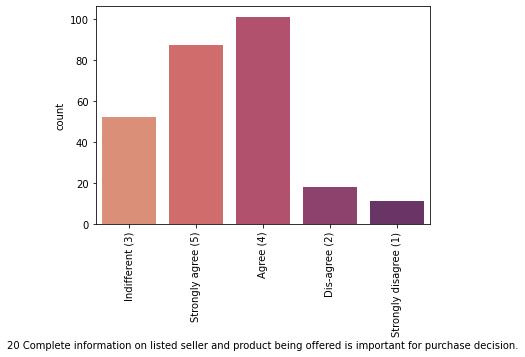

In [64]:
sns.countplot(df['20 Complete information on listed seller and product being offered is important for purchase decision.'],palette='flare', data = df);
plt.xticks(rotation=90)

### In online shopping customer are strongly agree with the fact that Complete information on listed seller and product being offered is important for purchase decision.

In [65]:
df['19 Information on similar product to the one highlighted  is important for product comparison'].value_counts()

Strongly agree (5)    116
Agree (4)              92
Indifferent (3)        43
Dis-agree (2)          18
Name: 19 Information on similar product to the one highlighted  is important for product comparison, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Indifferent (3)'),
  Text(1, 0, 'Strongly agree (5)'),
  Text(2, 0, 'Agree (4)'),
  Text(3, 0, 'Dis-agree (2)')])

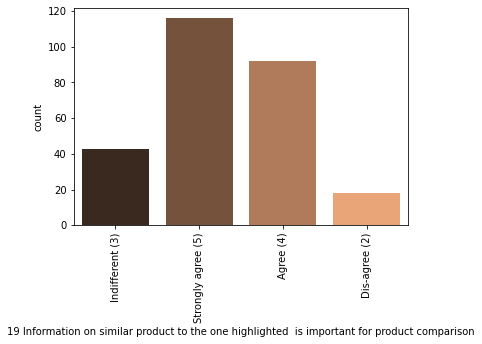

In [66]:
sns.countplot(df['19 Information on similar product to the one highlighted  is important for product comparison'],palette='copper', data = df);
plt.xticks(rotation=90)

### In online shopping customer are strongly agree with the fact that information on similar product to the one highlighted  is important for product comparison.

In [67]:
df['18 The content on the website must be easy to read and understand'].value_counts()

Strongly agree (5)       164
Agree (4)                 80
Strongly disagree (1)     18
Indifferent (3)            7
Name: 18 The content on the website must be easy to read and understand, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Agree (4)'),
  Text(1, 0, 'Strongly agree (5)'),
  Text(2, 0, 'Strongly disagree (1)'),
  Text(3, 0, 'Indifferent (3)')])

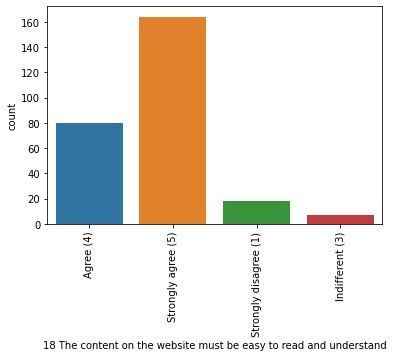

In [68]:
sns.countplot(df['18 The content on the website must be easy to read and understand'], data = df);
plt.xticks(rotation=90)

### In online shopping customer are strongly agree with the fact that the content on the website must be easy to read and understand.

In [21]:
df['Late declaration of price (promotion, sales period)'].value_counts()

Myntra.com                 75
Paytm.com                  52
snapdeal.com               41
Flipkart.com               38
Amazon.in                  38
Amazon.in, Paytm.com       13
Paytm.com, snapdeal.com     7
Amazon.in, Flipkart.com     5
Name: Late declaration of price (promotion, sales period), dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Flipkart.com'),
  Text(1, 0, 'snapdeal.com'),
  Text(2, 0, 'Myntra.com'),
  Text(3, 0, 'Paytm.com'),
  Text(4, 0, 'Amazon.in, Paytm.com'),
  Text(5, 0, 'Amazon.in'),
  Text(6, 0, 'Paytm.com, snapdeal.com'),
  Text(7, 0, 'Amazon.in, Flipkart.com')])

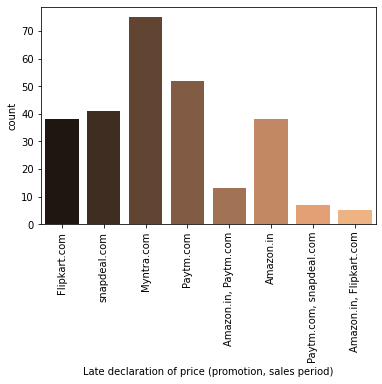

In [23]:
sns.countplot(df['Late declaration of price (promotion, sales period)'],palette='copper', data = df);
plt.xticks(rotation=90)

### From the above plot i can say that myntra need improvement on his website as it took longer time in declaration of price.

In [71]:
df['Longer page loading time (promotion, sales period)'].value_counts()

Myntra.com                          61
Paytm.com                           59
Flipkart.com                        32
Snapdeal.com                        23
Amazon.in, Flipkart.com             18
Amazon.in                           16
Paytm.com, Snapdeal.com             15
Amazon.in, Snapdeal.com             14
Amazon.in, Paytm.com                13
Flipkart.com, Snapdeal.com          11
Amazon.in, Paytm.com, Myntra.com     7
Name: Longer page loading time (promotion, sales period), dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Flipkart.com'),
  Text(1, 0, 'Snapdeal.com'),
  Text(2, 0, 'Myntra.com'),
  Text(3, 0, 'Paytm.com'),
  Text(4, 0, 'Amazon.in, Paytm.com'),
  Text(5, 0, 'Amazon.in, Flipkart.com'),
  Text(6, 0, 'Amazon.in, Snapdeal.com'),
  Text(7, 0, 'Flipkart.com, Snapdeal.com'),
  Text(8, 0, 'Paytm.com, Snapdeal.com'),
  Text(9, 0, 'Amazon.in'),
  Text(10, 0, 'Amazon.in, Paytm.com, Myntra.com')])

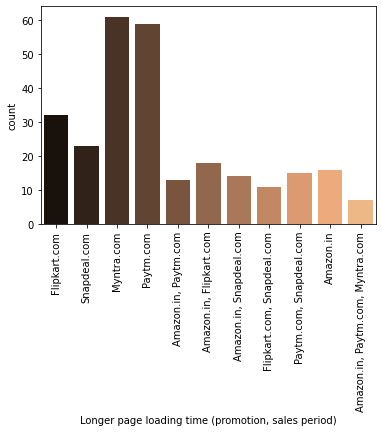

In [72]:
sns.countplot(df['Longer page loading time (promotion, sales period)'],palette='copper', data = df);
plt.xticks(rotation=90)

### From the above plot i can indentify that myntra website took more time in loading pages than other websites. So myntra need to improve its website than only it will able to retain their customer otherwise customers will shift to some other online companies like amazon, flipkart etc.

In [68]:
df['Limited mode of payment on most products (promotion, sales period)'].value_counts()

Snapdeal.com                87
Amazon.in                   62
Flipkart.com                31
Amazon.in, Flipkart.com     29
Paytm.com                   25
Paytm.com, Snapdeal.com     15
Amazon.in, Paytm.com        13
Myntra.com, Snapdeal.com     7
Name: Limited mode of payment on most products (promotion, sales period), dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Amazon.in'),
  Text(1, 0, 'Snapdeal.com'),
  Text(2, 0, 'Paytm.com'),
  Text(3, 0, 'Amazon.in, Paytm.com'),
  Text(4, 0, 'Flipkart.com'),
  Text(5, 0, 'Amazon.in, Flipkart.com'),
  Text(6, 0, 'Paytm.com, Snapdeal.com'),
  Text(7, 0, 'Myntra.com, Snapdeal.com')])

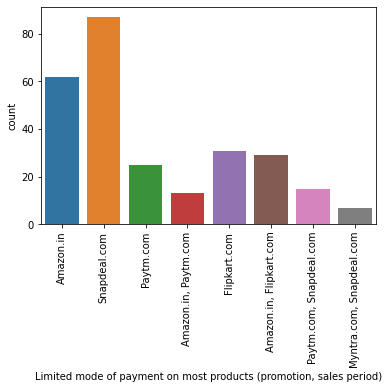

In [70]:
sns.countplot(df['Limited mode of payment on most products (promotion, sales period)'], data = df);
plt.xticks(rotation=90)

### The above plot gives clear idea that Snapdeal have only limited options for payment. It means that snapdeal provide less sales promotion for boosting sales among cutomer.

In [65]:
df['Longer delivery period'].value_counts()

Paytm.com                  72
Snapdeal.com               64
Flipkart.com               44
Amazon.in                  37
Myntra.com                 26
Paytm.com, Snapdeal.com    26
Name: Longer delivery period, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Paytm.com'),
  Text(1, 0, 'Snapdeal.com'),
  Text(2, 0, 'Flipkart.com'),
  Text(3, 0, 'Amazon.in'),
  Text(4, 0, 'Paytm.com, Snapdeal.com'),
  Text(5, 0, 'Myntra.com')])

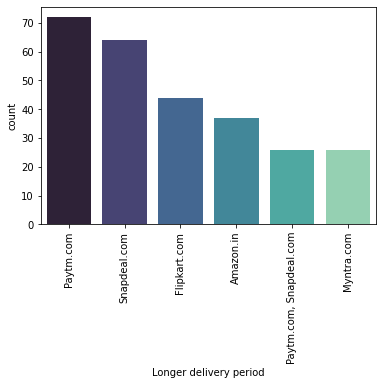

In [67]:
sns.countplot(df['Longer delivery period'],palette='mako', data = df);
plt.xticks(rotation=90)

### From the above plot i can say that paytm will be the least preferable as it has the longest delivery period. I can say that paytm need to work on delivery partners fro smooth and quick delivery.

In [63]:
df['Change in website/Application design'].value_counts()

Amazon.in                   96
Paytm.com                   63
Amazon.in, Flipkart.com     45
Myntra.com                  30
Flipkart.com                20
Snapdeal.com                 8
Flipkart.com, Myntra.com     7
Name: Change in website/Application design, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Flipkart.com'),
  Text(1, 0, 'Amazon.in'),
  Text(2, 0, 'Paytm.com'),
  Text(3, 0, 'Amazon.in, Flipkart.com'),
  Text(4, 0, 'Myntra.com'),
  Text(5, 0, 'Snapdeal.com'),
  Text(6, 0, 'Flipkart.com, Myntra.com')])

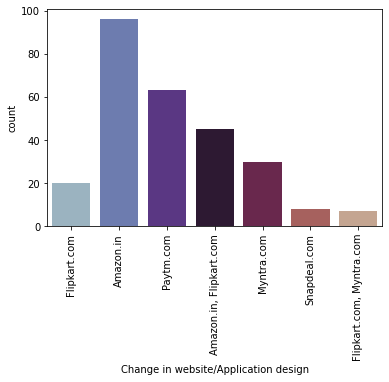

In [64]:
sns.countplot(df['Change in website/Application design'],palette='twilight', data = df);
plt.xticks(rotation=90)

### Amazon is really working a lot to improve its website and try to make it customise and friendly for user. The maximum changes made in website is amazon only which means amazon is taking once customer feedback seriously and this may be the reason that it is able to retain his customers as well as able to increase the new numbers of customers.

In [60]:
df['Frequent disruption when moving from one page to another'].value_counts()

Amazon.in                     53
Myntra.com                    52
Snapdeal.com                  49
Paytm.com                     39
Flipkart.com                  26
Amazon.in, Flipkart.com       25
Myntra.com, Snapdeal.com      14
Flipkart.com, Snapdeal.com    11
Name: Frequent disruption when moving from one page to another, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Amazon.in'),
  Text(1, 0, 'Myntra.com'),
  Text(2, 0, 'Paytm.com'),
  Text(3, 0, 'Amazon.in, Flipkart.com'),
  Text(4, 0, 'Snapdeal.com'),
  Text(5, 0, 'Flipkart.com'),
  Text(6, 0, 'Myntra.com, Snapdeal.com'),
  Text(7, 0, 'Flipkart.com, Snapdeal.com')])

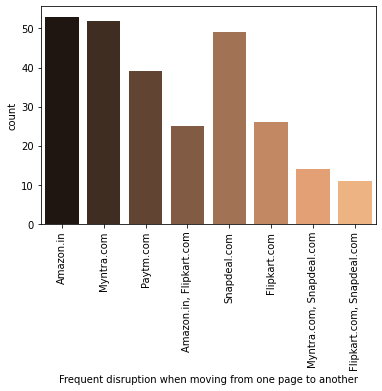

In [62]:
sns.countplot(df['Frequent disruption when moving from one page to another'],palette='copper', data = df);
plt.xticks(rotation=90)

### From the above plot we can identify that in amazon online shopping portal people do face issue while moving from one page to another. So amazon need to improve its website this might add drawbacks to his business.

In [57]:
df['Website is as efficient as before'].value_counts()

Amazon.in                             94
Flipkart.com                          47
Amazon.in, Flipkart.com               45
Amazon.in, Flipkart.com, Paytm.com    25
Amazon.in, Paytm.com                  18
Paytm.com                             15
Myntra.com, Snapdeal.com              14
Snapdeal.com                          11
Name: Website is as efficient as before, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Amazon.in'),
  Text(1, 0, 'Amazon.in, Flipkart.com'),
  Text(2, 0, 'Amazon.in, Flipkart.com, Paytm.com'),
  Text(3, 0, 'Paytm.com'),
  Text(4, 0, 'Snapdeal.com'),
  Text(5, 0, 'Myntra.com, Snapdeal.com'),
  Text(6, 0, 'Flipkart.com'),
  Text(7, 0, 'Amazon.in, Paytm.com')])

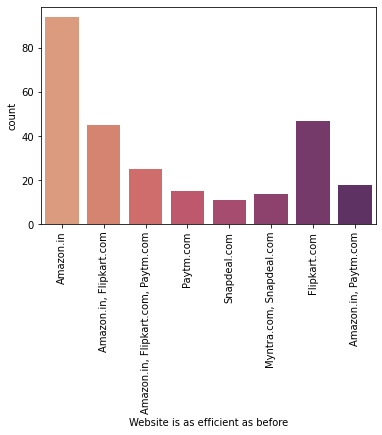

In [59]:
sns.countplot(df['Website is as efficient as before'],palette='flare', data = df);
plt.xticks(rotation=90)

### The amazon is most reliable than any other online platform. The above plot clearly indicates that amazon have good brand value and also trust worthy as it has more number of customer than other online compaines. Is also shows that amazon is successful in retention of there existing customer.

In [52]:
df['Which of the Indian online retailer would you recommend to a friend?'].value_counts()

Amazon.in                                            79
Amazon.in, Flipkart.com                              62
Flipkart.com                                         39
Amazon.in, Myntra.com                                30
Amazon.in, Paytm.com, Myntra.com                     20
Amazon.in, Flipkart.com, Myntra.com                  15
Amazon.in, Paytm.com                                 13
Flipkart.com, Paytm.com, Myntra.com, snapdeal.com    11
Name: Which of the Indian online retailer would you recommend to a friend?, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Flipkart.com'),
  Text(1, 0, 'Amazon.in, Myntra.com'),
  Text(2, 0, 'Amazon.in, Paytm.com, Myntra.com'),
  Text(3, 0, 'Amazon.in, Flipkart.com'),
  Text(4, 0, 'Amazon.in, Paytm.com'),
  Text(5, 0, 'Flipkart.com, Paytm.com, Myntra.com, snapdeal.com'),
  Text(6, 0, 'Amazon.in'),
  Text(7, 0, 'Amazon.in, Flipkart.com, Myntra.com')])

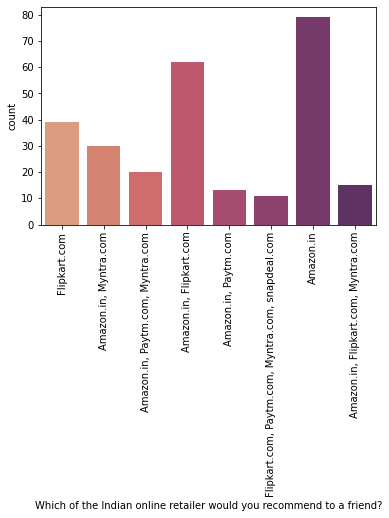

In [56]:
sns.countplot(df['Which of the Indian online retailer would you recommend to a friend?'],palette='flare', data = df);
plt.xticks(rotation=90)

### From the above graph i can say that amazon plays the vital role in online shop. I can recommend amazon to my firends as its value counts in graph is more than any other online companies. This gives us an idea that amazon have good customer services so more number of people prefer amazon than any other online companies for online shopping.

## Label Encoder

In [7]:
# Using label encoder

le = LabelEncoder()
df = df.apply(LabelEncoder().fit_transform)   
df.head()

1Gender of respondent  2 How old are you?   \
0                      1                    1   
1                      0                    0   
2                      0                    0   
3                      1                    0   
4                      0                    0   

   3 Which city do you shop online from?  \
0                                      2   
1                                      2   
2                                      4   
3                                      6   
4                                      0   

   4 What is the Pin Code of where you shop online from?  \
0                                                  1       
1                                                  5       
2                                                 23       
3                                                 11       
4                                                 31       

   5 Since How Long You are Shopping Online ?  \
0                                           3   
1                                           3   
2                                           2   
3                                           2   
4                                           1   

   6 How many times you have made an online purchase in the past 1 year?  \
0                                                  2                       
1                                                  3                       
2                                                  3                       
3                                                  5                       
4                                                  0                       

   7 How do you access the internet while shopping on-line?  \
0                                                  0          
1                                                  3          
2                                                  1          
3                                                  1          
4                                                  3          

   8 Which device do you use to access the online shopping?  \
0                                                  0          
1                                                  2          
2                                                  2          
3                                                  2          
4                                                  2          

   9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                                  3                                                      
1                                                  0                                                      
2                                                  2                                                      
3                                                  2                                                      
4                                                  0                                                      

   10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                                                  2                                                        
1                                                  1                                                        
2                                                  0                                                        
3                                                  1                                                        
4                                                  1                                                        

   ...  Longer time to get logged in (promotion, sales period)  \
0  ...                                                  0        
1  ...                                                  1        
2  ...                                                  7        
3  ...    

### Applied Label Encoder to convert all the string columns into integers.

In [8]:
df.describe()

1Gender of respondent  2 How old are you?   \
count             269.000000           269.000000   
mean                0.327138             1.330855   
std                 0.470042             1.183774   
min                 0.000000             0.000000   
25%                 0.000000             0.000000   
50%                 0.000000             1.000000   
75%                 1.000000             2.000000   
max                 1.000000             4.000000   

       3 Which city do you shop online from?  \
count                             269.000000   
mean                                4.494424   
std                                 3.187687   
min                                 0.000000   
25%                                 2.000000   
50%                                 4.000000   
75%                                 7.000000   
max                                10.000000   

       4 What is the Pin Code of where you shop online from?  \
count                                         269.000000       
mean                                           18.163569       
std                                            10.343865       
min                                             0.000000       
25%                                            10.000000       
50%                                            19.000000       
75%                                            24.000000       
max                                            38.000000       

       5 Since How Long You are Shopping Online ?  \
count                                  269.000000   
mean                                     2.323420   
std                                      1.176357   
min                                      0.000000   
25%                                      1.000000   
50%                                      3.000000   
75%                                      3.000000   
max                                      4.000000   

       6 How many times you have made an online purchase in the past 1 year?  \
count                                         269.000000                       
mean                                            3.237918                       
std                                             1.739331                       
min                                             0.000000                       
25%                                             2.000000                       
50%                                             3.000000                       
75%                                             5.000000                       
max                                             5.000000                       

       7 How do you access the internet while shopping on-line?  \
count                                         269.000000          
mean                                            2.078067          
std                                             0.715919          
min                                             0.000000          
25%                                             2.000000          
50%                                             2.000000          
75%                                             3.000000          
max                                             3.000000          

       8 Which device do you use to access the online shopping?  \
count                                         269.000000          
mean                                            1.501859          
std                                             0.751240          
min                                             0.000000          
25%                                             1.000000          
50%                                             2.000000          
75%                                             2.000000          
max                                             3.000000          

       9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
c

### From the above describe method, we find out that how the each parameters are distributed across the dataset, From this method we got to know the  five point summary analysis like mean, max and the quartiles.


## Distribution Plot

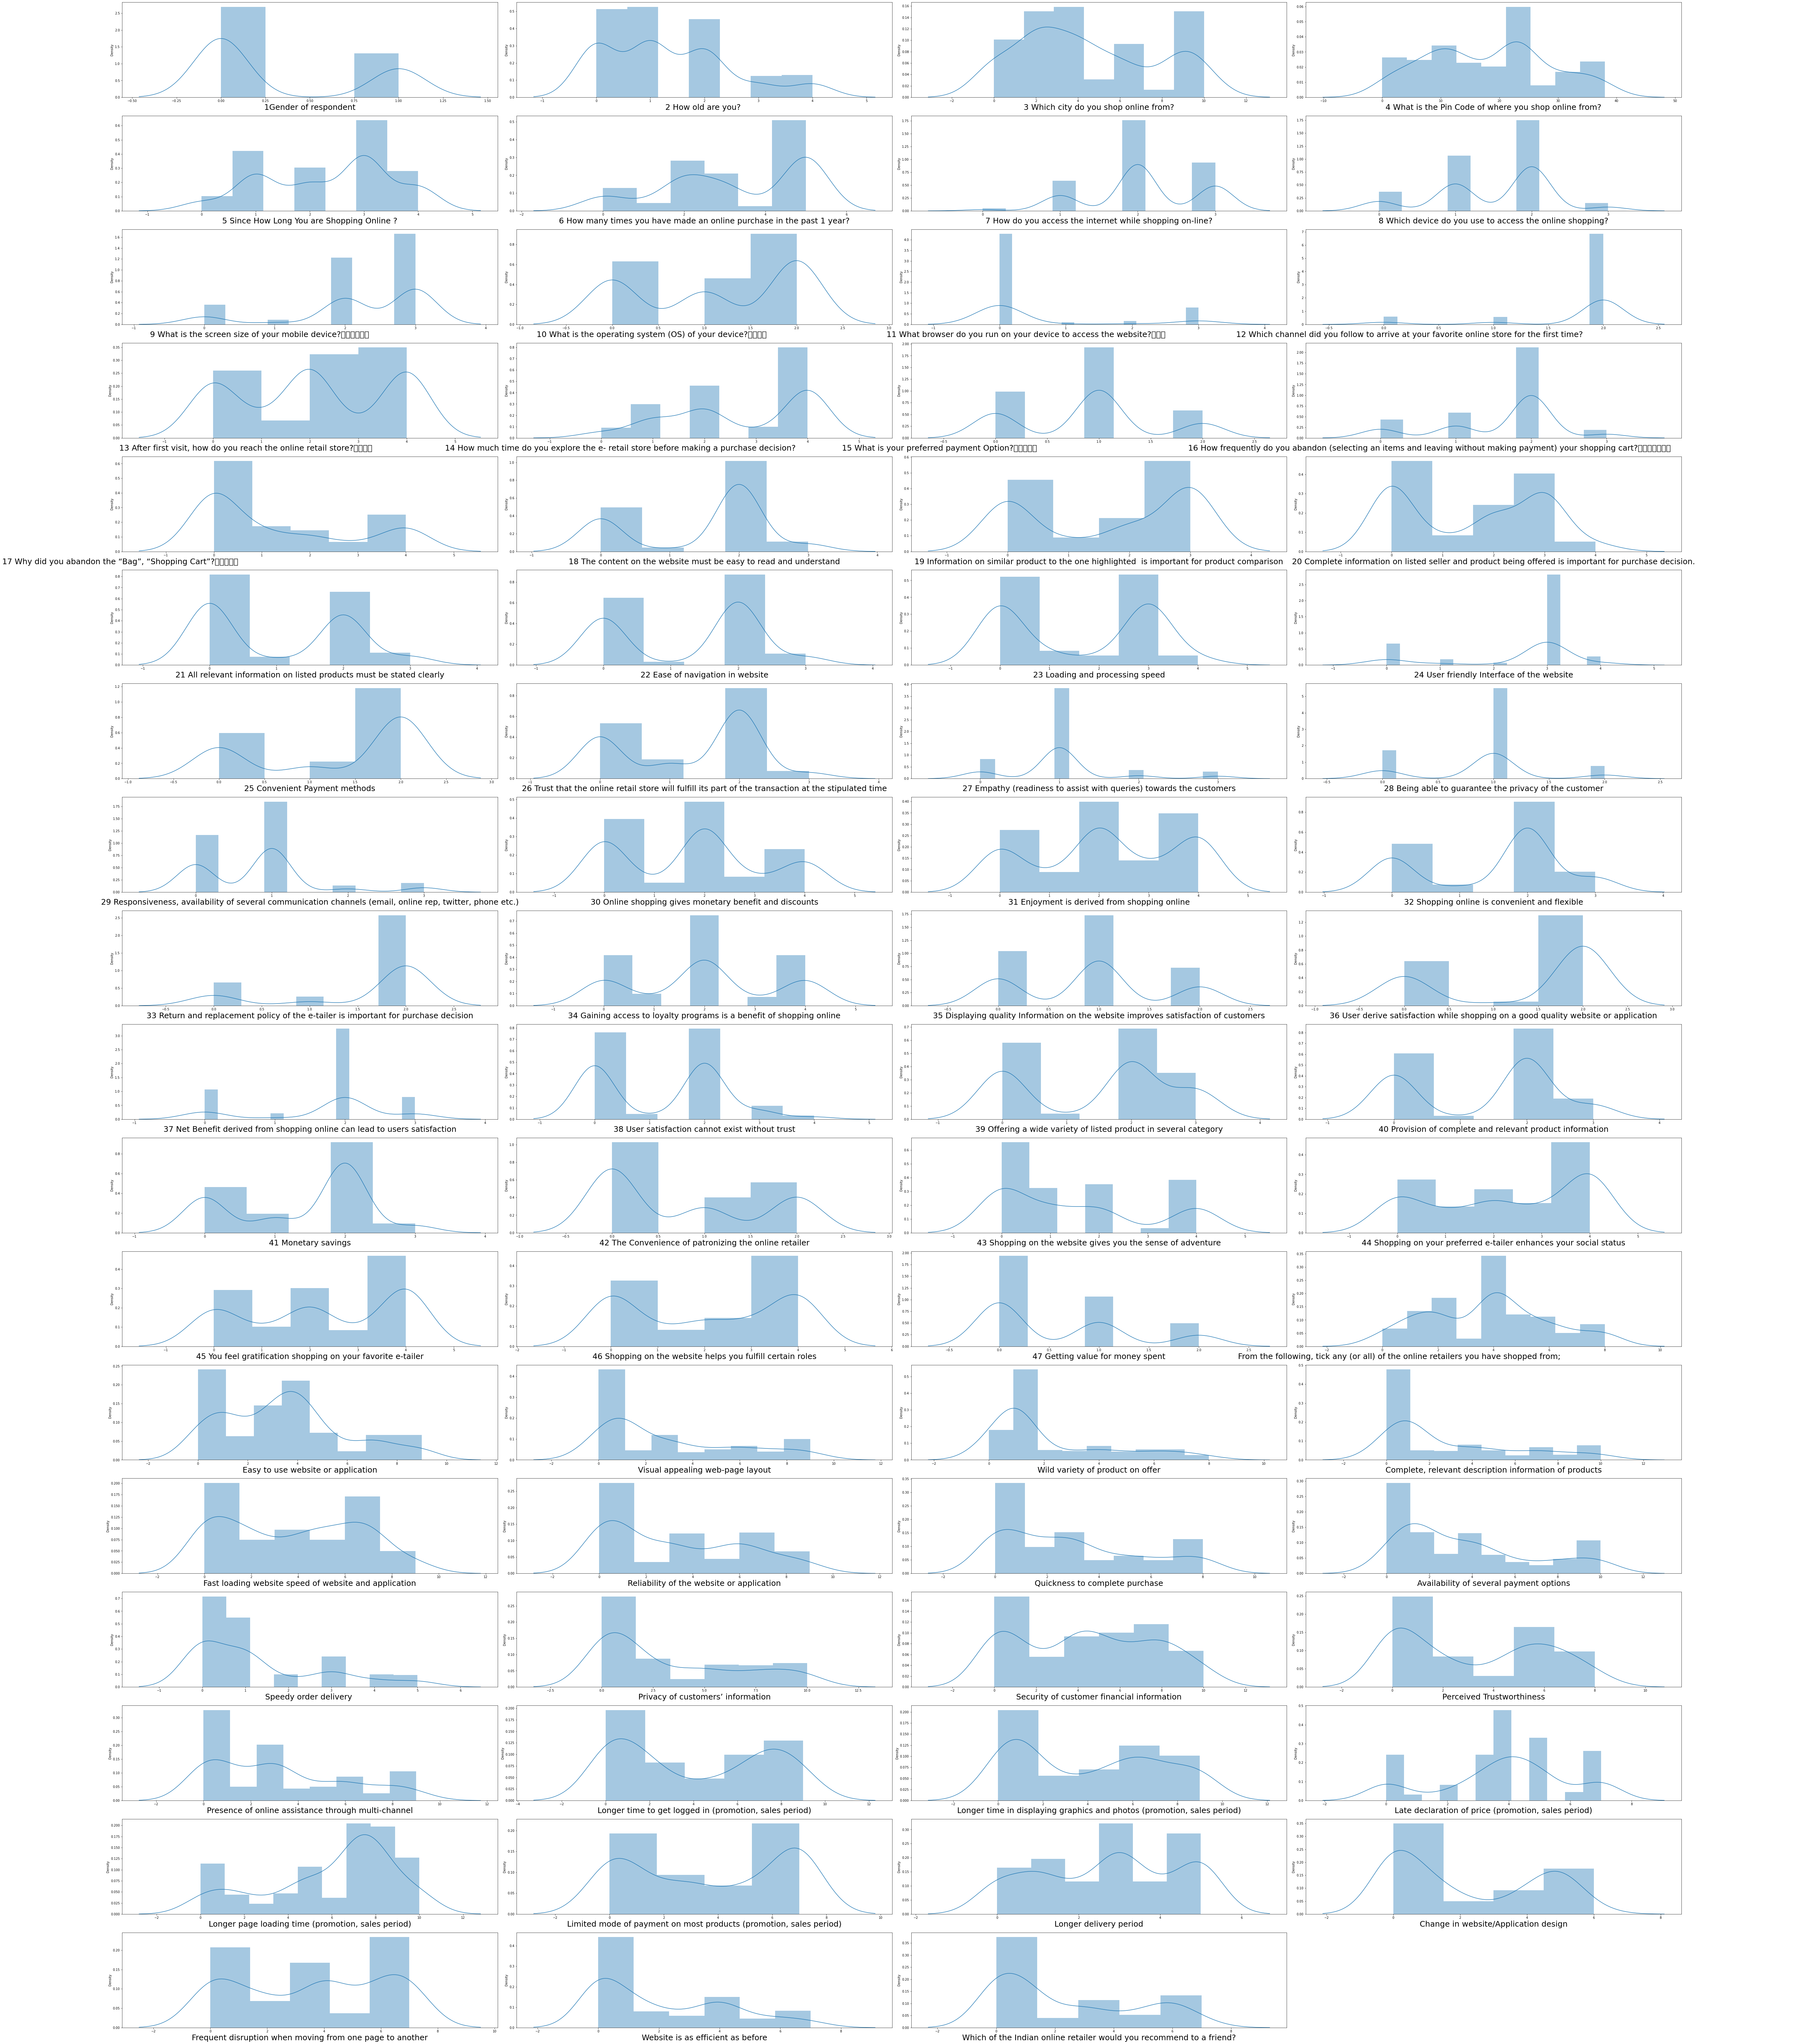

In [22]:
# using the the distribution plot 

plt.figure(figsize=(70,100), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=71:
        ax=plt.subplot(20,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout() 

## Box Plot

<AxesSubplot:xlabel='4 What is the Pin Code of where you shop online from?'>

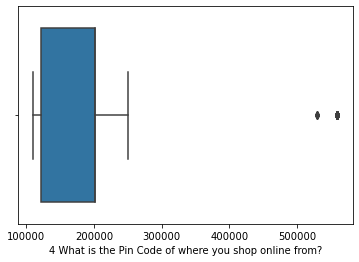

In [22]:
sns.boxplot(df['4 What is the Pin Code of where you shop online from?'])

1Gender of respondent                                                                                                                                                                                                     AxesSubplot(0.125,0.848277;0.168478x0.0317227)
2 How old are you?                                                                                                                                                                                                     AxesSubplot(0.327174,0.848277;0.168478x0.0317227)
3 Which city do you shop online from?                                                                                                                                                                                  AxesSubplot(0.529348,0.848277;0.168478x0.0317227)
4 What is the Pin Code of where you shop online from?                                                                                                                                                        

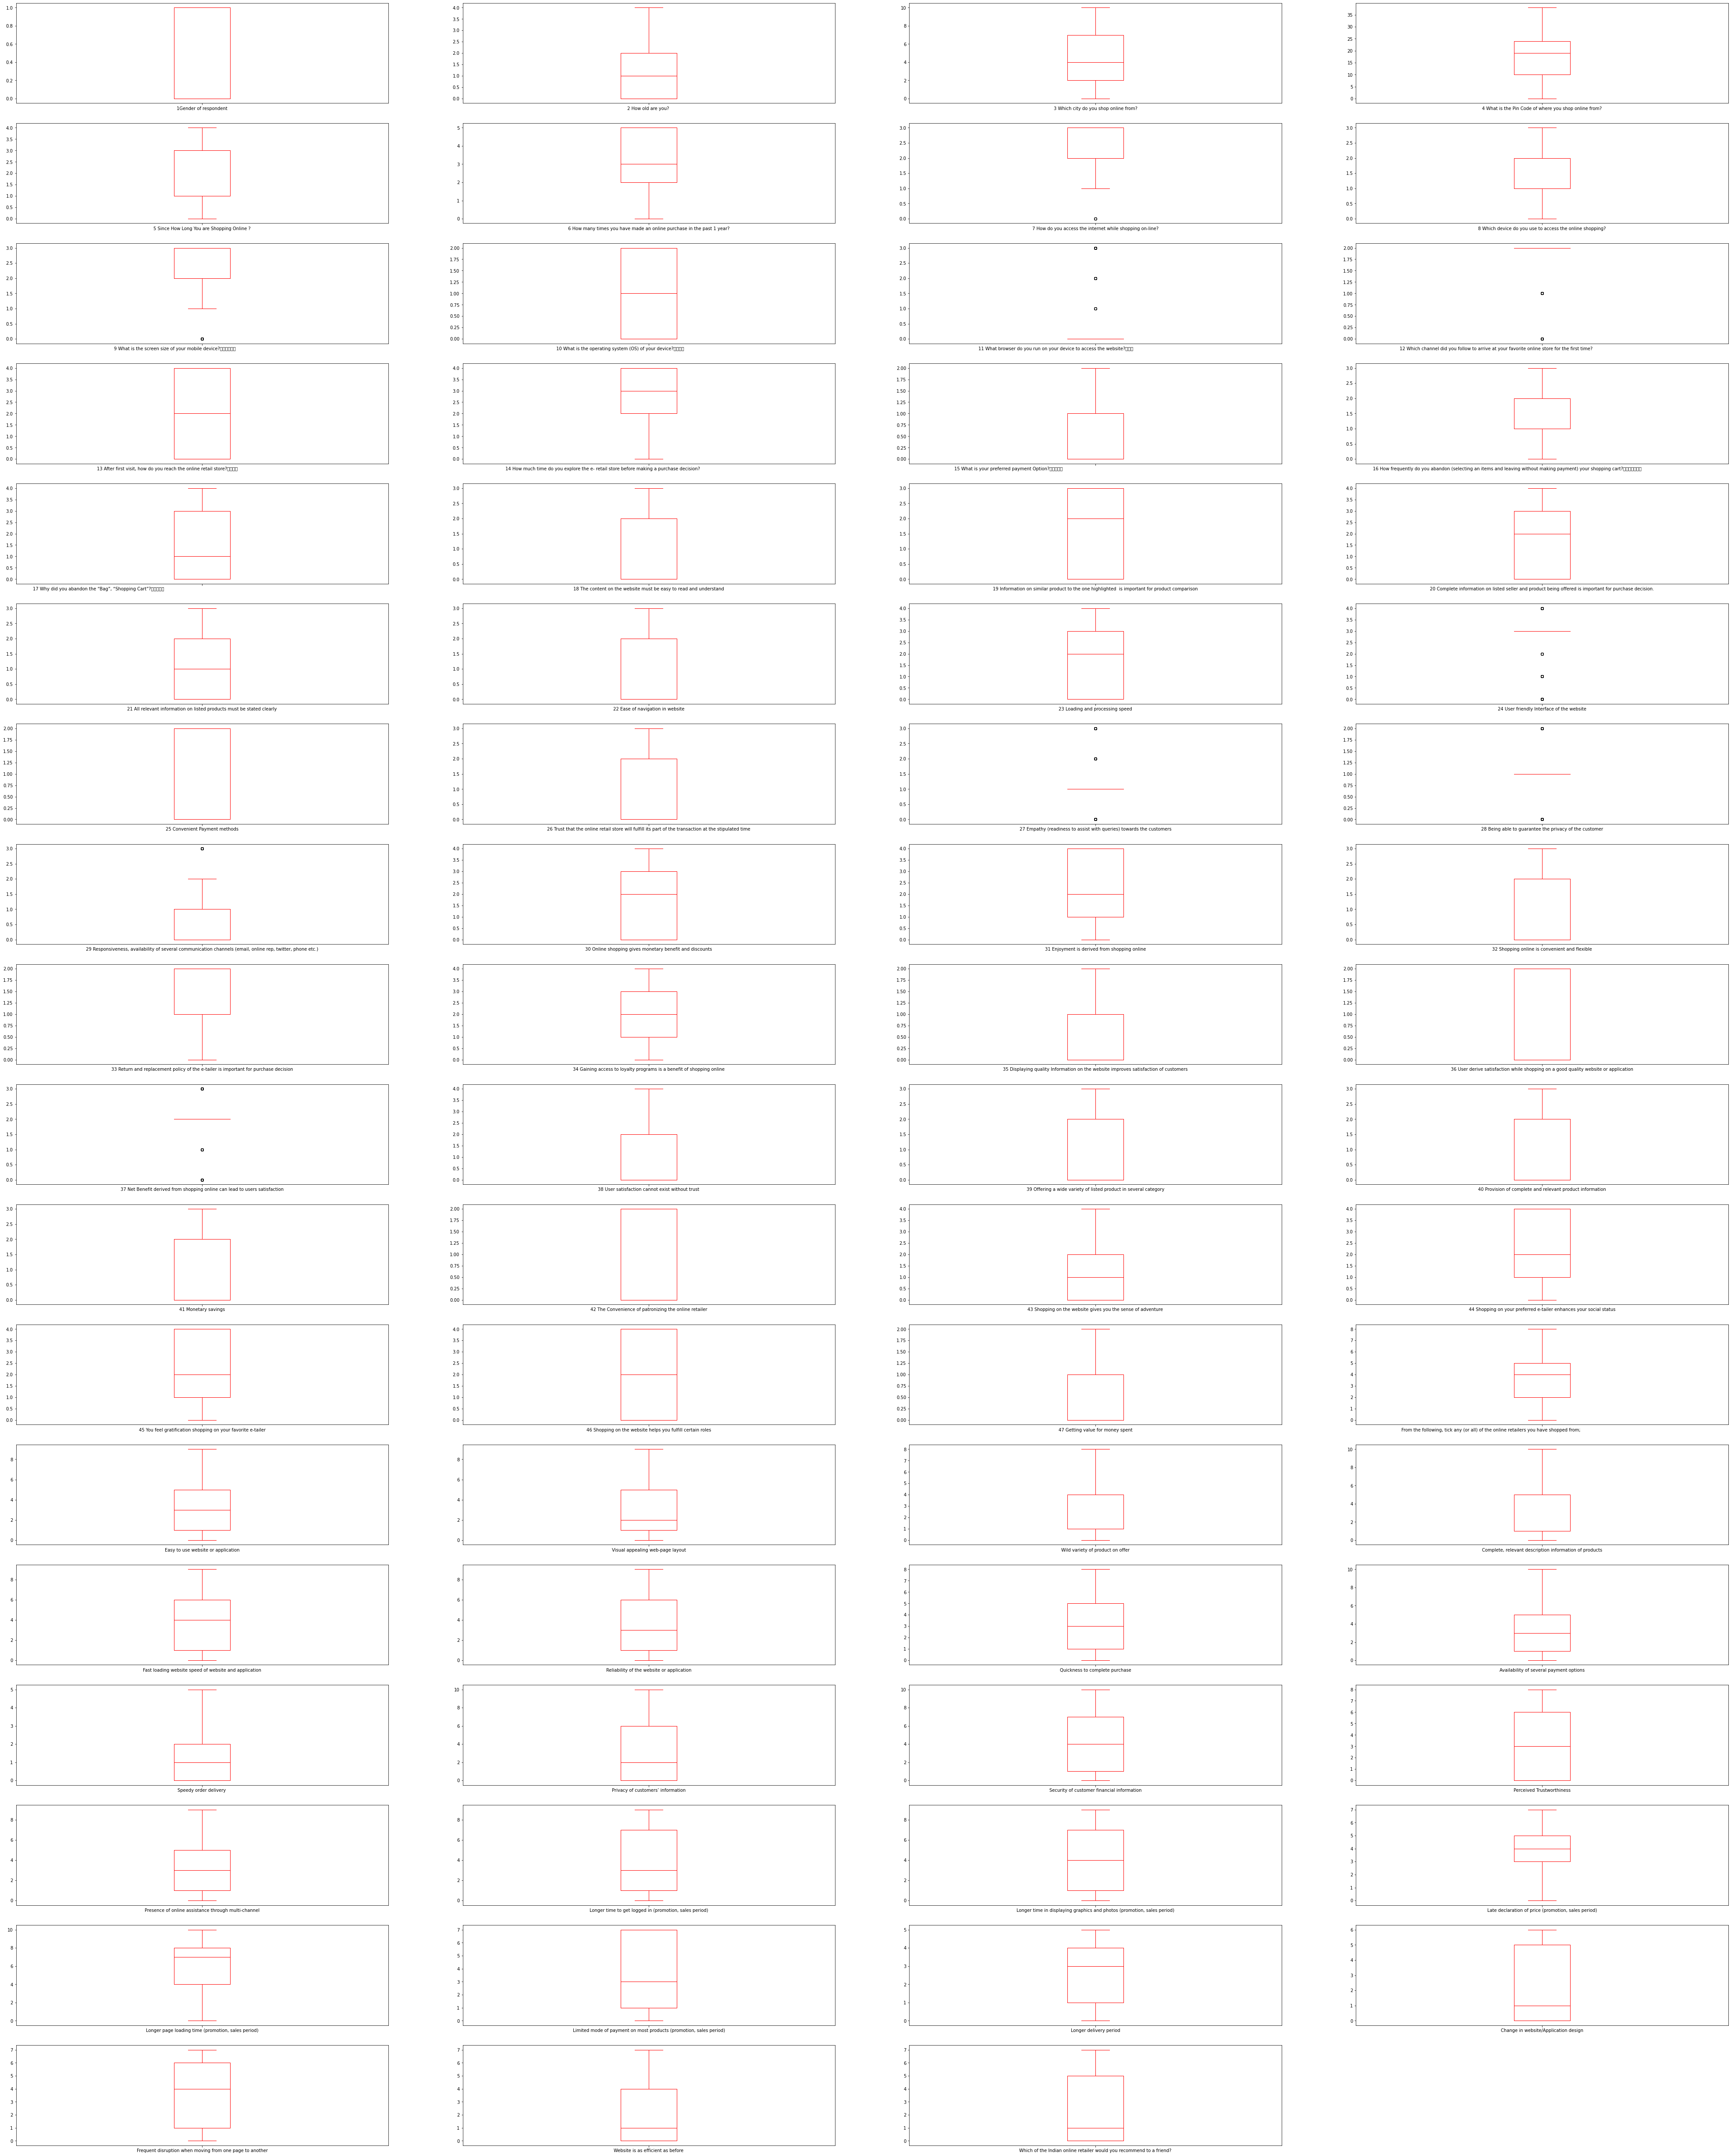

In [26]:
df.plot(kind='box',subplots=True,layout=(20,4),color="red",figsize=(70,100))

### There is no outliers in any columns

## Conclusion

### From this project :
#### a)Having the right customer retention strategy will keep your company grows if you know how to take advantage of it. 
#### b)Your customers will find their way back and continue buying stuff from you. 
#### c)At the end of the day, what you need to do is fulfilling your customers’ needs, listen to their complaints and provide professional solutions. 
#### d)If your customers feel like they are valued, they will become increasingly loyal to your brand.
#### e) According to my reseacrh & analysis Customer are the best wealth wisher of a company if they are certified with ultimate useful good products.